In [1]:
#!pip install  nbconvert[webpdf]
import nbconvert
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
excel_file = "PH_Data2.xlsx"  # Replace with the actual file path
sheet_name = "Data"
import matplotlib.pyplot as plt
# Read the data from the specified sheet into a DataFrame
df = pd.read_excel(excel_file, sheet_name=sheet_name)
df = df.fillna(method='ffill')

#print(df.head())
print(len(df))
date = df['Date']
print(df.columns)


72
Index(['Date', 'RGDP_sa', 'RINV_sa', 'RGCE_sa', 'RGovExp_sa', 'Rlend_sa',
       'REER_sa', 'Rrate', 'RNXG_sa', 'RNX_sa', 'RCAB_sa', 'RNXG_RGDP',
       'RNX_RGDP', 'RCAB_RGDP', 'RFFFund_1', 'RFFFund_2', 'RUSFFund',
       'FCPIsa_1', 'FCPIsa_2', 'Wcomm_sa', 'FGDPsa_1', 'FGDPsa_2', 'PGDP_sa',
       'CPI_sa', 'inflation', 'Rexpgd_sa', 'Rexp_sa', 'RCAcredit_sa', 'rate',
       'FFFund_1', 'FFFund_2', 'USFFund', 'Ginflation1', 'Ginflation2',
       'Wcomm_inflation', 'ExRet', 'CDS', 'RGCE_GDP', 'RGovExp_GDP',
       'GovBal_GDP', 'Debt_GDP', 'Stock_index', 'Rstock_index',
       'Rstock_index_cpi', 'RPCE_sa'],
      dtype='object')


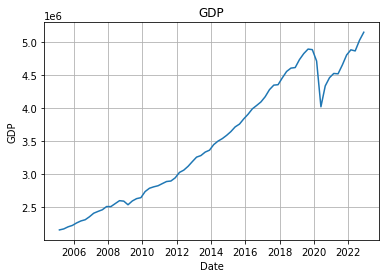

In [56]:
GDP = df['RGDP_sa']
GDP = np.array(GDP)
Inflation = df['inflation']
Inflation = np.array(Inflation)
plt.plot(date, GDP)
Rate = df['rate']
Rate = np.array(Rate)
WinfC = df['Wcomm_inflation']
WinfC = np.array(WinfC)
ExRet= df['ExRet']
ExRet  = np.array(ExRet)
plt.title('GDP')
plt.xlabel('Date')
plt.ylabel('GDP')
#plt.legend('GDP')
plt.grid(True)
plt.show()

In [5]:
ygrowth = np.log(GDP[5:]) - np.log(GDP[:-5])



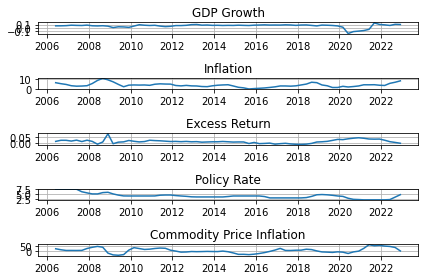

In [57]:
import matplotlib.pyplot as plt

# Create the first subplot (top)
plt.subplot(5, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(date[5:], ygrowth)
plt.title('GDP Growth')  # Add a title if desired
plt.grid(True)  # Add grid to the first subplot
plt.axis('tight')  # Set axis limits to the data range


# Create the second subplot (bottom)
plt.subplot(5, 1, 2)  # 2 rows, 1 column, second subplot
plt.plot(date[5:], Inflation[5:])
plt.title('Inflation')  # Add a title if desired
plt.grid(True)  # Add grid to the first subplot
plt.axis('tight')  # Set axis limits to the data range

plt.subplot(5, 1,3)  # 2 rows, 1 column, second subplot
plt.plot(date[5:], ExRet[5:])
plt.title('Excess Return')  # Add a title if desired
plt.grid(True)  # Add grid to the first subplot
plt.axis('tight')  # Set axis limits to the data range

plt.subplot(5, 1,4)  # 2 rows, 1 column, second subplot
plt.plot(date[5:], Rate[5:])
plt.title('Policy Rate')  # Add a title if desired
plt.grid(True)  # Add grid to the first subplot
plt.axis('tight')  # Set axis limits to the data range

plt.subplot(5, 1,5)  # 2 rows, 1 column, second subplot
plt.plot(date[5:], WinfC[5:])
plt.title('Commodity Price Inflation')  # Add a title if desired
plt.grid(True)  # Add grid to the first subplot
plt.axis('tight')  # Set axis limits to the data range



# Adjust the layout to avoid overlap
plt.tight_layout()

plt.show()


In [35]:
import yfinance as yf
import pandas as pd

# Define the currency pair symbol




# Define the currency pair symbol (CNY/USD) and date range
currency_pair = "PHPUSD=X"  # Yahoo Finance symbol for CNY/USD
start_date = "2005-01-01"
end_date = "2023-01-01"

# Fetch historical data
ph_data = yf.download(currency_pair, start=start_date, end=end_date, progress=False)

# Reset the index to access date as a column
ph_data.reset_index(inplace=True)

In [39]:

import numpy as np

# Assuming your arrays are originally 1D arrays or lists
ygrowth = np.array(ygrowth).reshape(-1, 1)  # Convert to a column vector
Inflation = np.array(Inflation[5:]).reshape(-1, 1)
ExRet = np.array(ExRet[5:]).reshape(-1, 1)
Rate = np.array(Rate[5:]).reshape(-1, 1)
WinfC = np.array(WinfC[5:]).reshape(-1, 1)

# Now you can concatenate them along axis 1
X = np.concatenate((ygrowth, Inflation, ExRet, Rate, WinfC), axis=1)




In [44]:
Y = Inflation[5:]
X1 = X[:-5,:]

In [65]:
import statsmodels.api as sm

# Assuming you have your dependent variable y and independent variable(s) X
# Add a constant term to the independent variables
X11 = sm.add_constant(X1)
Ytrain = Y[1:55]
Xtrain = X11[1:55,:]
Ytest = Y[55:]
Xtest = X11[55:,:]

# Fit the OLS regression model
model = sm.OLS(Ytrain, Xtrain).fit()
forecast = model.predict(Xtest)
error_ols = Ytest - forecast
RMSQ_ols = np.sqrt(np.mean(error_ols**2))
print(RMSQ_ols)

# Print the summary of the regression results
print(model.summary())


2.5460286523065636
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     6.594
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           9.59e-05
Time:                        10:45:14   Log-Likelihood:                -100.19
No. Observations:                  54   AIC:                             212.4
Df Residuals:                      48   BIC:                             224.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1786      1.655 

In [47]:
len(Y)

62

In [53]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Generate random data for training


n_timesteps = 1
n_features = 4

Ytrain = Y[1:55]
Xtrain = X11[1:55,1:]
Ytest = Y[55:]
Xtest = X11[55:,1:]

n_samples = len(Ytrain)
n_timesteps = 1

nrows, ncols = Xtest.shape

n_features = ncols

# Create a GRU network
model = Sequential()
#model.add(GRU(4, activation='tanh', input_shape=(n_timesteps, n_features)))
#model.add(Dense(1))  # Output layer
# Create an Elman Recurrent Network
model = Sequential()
model.add(SimpleRNN(units=4, activation='tanh', input_shape=(n_timesteps, n_features), return_sequences=False))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

XXtrain1 = XXtrain.reshape(len(XXtrain),1,n_features)
# Train the model
model.fit(XXtrain1, Ytrain, epochs=100, batch_size=32)

# Generate new data for prediction (you can replace this with your own test data)

# Make predictions
Xtest_reshaped = Xtest.reshape(Xtest.shape[0], 1, Xtest.shape[1])
predictions = model.predict(Xtest_reshaped)

error =  Ytest - predictions

print("Predictions:", predictions)


Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 22.4183
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 22.1846
Epoch 3/100
2/2 [==============================] - 0s 0s/step - loss: 21.9716
Epoch 4/100
2/2 [==============================] - 0s 0s/step - loss: 21.7384
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 21.4971
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 21.2772
Epoch 7/100
2/2 [==============================] - 0s 0s/step - loss: 21.0411
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 20.8020
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 20.5681
Epoch 10/100
2/2 [==============================] - 0s 0s/step - loss: 20.3262
Epoch 11/100
2/2 [==============================] - 0s 0s/step - loss: 20.0998
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 19.8636
Epoch 13/100
2/2 [==============================] - 0s 0s

In [59]:
rmsq_nn = np.sqrt(np.mean(error**2))


In [60]:
rmsq_nn


3.178264854394167